In [1]:
from orbit import Orbit, AU2km, mu, day2s
import elements as el
import angles as an
from lambert_izzo import lambert as lambert_izzo

from lambert import lambert as lambert_bate

import sys

import numpy as np
from numpy.linalg import norm
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [2]:
df = pd.read_csv('../gtoc4_problem_data.txt', skiprows=2,delimiter= '\s+',header=None)
df.columns = ['Name','Epoch','a','e','i','LAN','omega','M0']
df.head()

,Name,Epoch,a,e,i,LAN,omega,M0
0,'1580',54800.0,2.196803,0.487683,52.090794,62.324795,159.539839,3.521687
1,'1620',54800.0,1.245551,0.335511,13.337693,337.266017,276.806539,136.950031
2,'1943',54800.0,1.430317,0.255816,8.704065,246.401915,338.253875,288.405238
3,'2061',54800.0,2.264953,0.537119,3.770822,207.654108,156.432028,46.995497
4,'2135',54800.0,1.599572,0.503268,23.054312,191.262849,290.838892,256.724981


In [3]:
asteroids = set()

In [4]:
df.iloc[0]

Name       '1580'
Epoch       54800
a          2.1968
e        0.487683
i         52.0908
LAN       62.3248
omega      159.54
M0        3.52169
Name: 0, dtype: object

In [5]:
[*df.iloc[0]]

["'1580'",
 54800.0,
 2.1968033753931695,
 0.4876831067819973,
 52.09079390385544,
 62.32479511597435,
 159.53983855505257,
 3.5216868177911254]

In [6]:
for i in range(len(df)):
    o = Orbit(name=df.iloc[i].Name)
    o.from_gtoc(*df.iloc[i])
    asteroids.add(o)

In [7]:
print(o.details())

Orbit: '6344P-L'
 Epoch     :  54800.0
 a         :  2.80410817 AU
 e         :  0.66708346
 inc       :  4.72681220 deg
 LAN       :  183.61177196 deg
 argp      :  234.06965519 deg
 meanAnom0 :  79.37913845 deg
 trueAnom0 :  147.76999611 deg
 h         :  5558559544.97229767 km2/s
 r0        :  [-3.22550105 -1.53048387 0.10949722] AU
 v0        :  [-3.20201373 -12.99982017 1.05609073] km/s


In [8]:
asteroids;

In [9]:
for ast in asteroids:
    print("**  **  **")
    print(ast.details())

**  **  **
Orbit: '5381'
 Epoch     :  54800.0
 a         :  0.94747226 AU
 e         :  0.29615153
 inc       :  48.96972507 deg
 LAN       :  58.55949159 deg
 argp      :  37.42691489 deg
 meanAnom0 :  120.56880321 deg
 trueAnom0 :  144.45330608 deg
 h         :  4142564221.96877527 km2/s
 r0        :  [-0.57275309 -0.98385249 -0.02818552] AU
 v0        :  [11.25394294 -12.40668760 -18.47032745] km/s
**  **  **
Orbit: '1997UA11'
 Epoch     :  54800.0
 a         :  2.36304644 AU
 e         :  0.62045902
 inc       :  3.30025118 deg
 LAN       :  212.51260528 deg
 argp      :  138.42946364 deg
 meanAnom0 :  26.17825764 deg
 trueAnom0 :  94.73531322 deg
 h         :  5371591959.25141430 km2/s
 r0        :  [0.11654867 1.52573403 -0.07057890] AU
 v0        :  [-22.19931285 16.96354035 -1.51291401] km/s
**  **  **
Orbit: '2005HB'
 Epoch     :  54800.0
 a         :  2.70207682 AU
 e         :  0.60707883
 inc       :  9.21596440 deg
 LAN       :  96.75150035 deg
 argp      :  125.30979283 

Orbit: '2004SB20'
 Epoch     :  54800.0
 a         :  1.18295068 AU
 e         :  0.41312456
 inc       :  30.27890718 deg
 LAN       :  30.95515064 deg
 argp      :  209.33254872 deg
 meanAnom0 :  175.31022398 deg
 trueAnom0 :  177.86057809 deg
 h         :  4413316085.64499092 km2/s
 r0        :  [0.93531700 1.32990899 0.38499326] AU
 v0        :  [-13.63613840 7.84959101 8.02546663] km/s
**  **  **
Orbit: '2004SB56'
 Epoch     :  54800.0
 a         :  0.86572959 AU
 e         :  0.23794232
 inc       :  18.69681569 deg
 LAN       :  302.11000003 deg
 argp      :  233.44411916 deg
 meanAnom0 :  262.07506808 deg
 trueAnom0 :  236.95707304 deg
 h         :  4026741776.49992323 km2/s
 r0        :  [0.53184381 0.71997996 0.28196764] AU
 v0        :  [-26.03665065 12.69314849 -5.18011940] km/s
**  **  **
Orbit: '2004SD20'
 Epoch     :  54800.0
 a         :  0.87507856 AU
 e         :  0.46494242
 inc       :  21.33378893 deg
 LAN       :  46.64092042 deg
 argp      :  94.38327410 deg
 mea

 v0        :  [20.51428938 -28.43468666 0.05169801] km/s
**  **  **
Orbit: '2002YQ5'
 Epoch     :  54800.0
 a         :  1.28694719 AU
 e         :  0.12354813
 inc       :  15.54667559 deg
 LAN       :  279.98407147 deg
 argp      :  258.50802446 deg
 meanAnom0 :  314.01296402 deg
 trueAnom0 :  302.68899944 deg
 h         :  5016014269.48729324 km2/s
 r0        :  [-0.59961806 1.01912700 -0.11513306] AU
 v0        :  [-21.80922150 -16.80542664 -6.78606354] km/s
**  **  **
Orbit: '2006XY'
 Epoch     :  54800.0
 a         :  1.49800105 AU
 e         :  0.33851279
 inc       :  3.63848411 deg
 LAN       :  257.96916562 deg
 argp      :  184.09742533 deg
 meanAnom0 :  24.79984094 deg
 trueAnom0 :  49.96912245 deg
 h         :  5131526424.06445503 km2/s
 r0        :  [-0.72757764 0.80860260 -0.05596727] AU
 v0        :  [-27.83230480 -16.11885645 -1.51731059] km/s
**  **  **
Orbit: '2003AA3'
 Epoch     :  54800.0
 a         :  1.42129516 AU
 e         :  0.28940560
 inc       :  13.7822221

Orbit: '2008JF'
 Epoch     :  54800.0
 a         :  1.90709232 AU
 e         :  0.39283126
 inc       :  19.81819803 deg
 LAN       :  90.78388527 deg
 argp      :  235.60175572 deg
 meanAnom0 :  21.39246713 deg
 trueAnom0 :  49.65015987 deg
 h         :  5658591417.87392807 km2/s
 r0        :  [1.16227978 0.35417425 -0.42057053] AU
 v0        :  [-1.32112891 30.21403402 0.32709926] km/s
**  **  **
Orbit: '2004UT1'
 Epoch     :  54800.0
 a         :  0.96433889 AU
 e         :  0.22108742
 inc       :  4.50734038 deg
 LAN       :  211.97056772 deg
 argp      :  294.22792468 deg
 meanAnom0 :  28.42363163 deg
 trueAnom0 :  44.08611879 deg
 h         :  4267279609.82619810 km2/s
 r0        :  [-0.77831035 -0.14208128 -0.02298481] AU
 v0        :  [1.67544890 -36.23070468 2.49281020] km/s
**  **  **
Orbit: '2008JO'
 Epoch     :  54800.0
 a         :  1.50889457 AU
 e         :  0.54552770
 inc       :  5.37205444 deg
 LAN       :  276.96736964 deg
 argp      :  194.65883172 deg
 meanAnom0 

Orbit: '2003UX34'
 Epoch     :  54800.0
 a         :  1.09521871 AU
 e         :  0.61569793
 inc       :  2.56636511 deg
 LAN       :  4.67605817 deg
 argp      :  218.16988293 deg
 meanAnom0 :  293.32273264 deg
 trueAnom0 :  223.61081555 deg
 h         :  3674391245.97450924 km2/s
 r0        :  [0.07593289 1.22348445 0.05437843] AU
 v0        :  [-20.92774522 -14.06000951 -0.55162442] km/s
**  **  **
Orbit: '2007TC14'
 Epoch     :  54800.0
 a         :  2.09692939 AU
 e         :  0.80820620
 inc       :  4.64470378 deg
 LAN       :  224.24921140 deg
 argp      :  269.11991493 deg
 meanAnom0 :  118.28995932 deg
 trueAnom0 :  168.24213722 deg
 h         :  3799720802.52963114 km2/s
 r0        :  [1.81818246 -2.95877168 0.27526040] AU
 v0        :  [9.20776630 -1.06013867 0.58368442] km/s
**  **  **
Orbit: '2003VE1'
 Epoch     :  54800.0
 a         :  1.94275275 AU
 e         :  0.49504090
 inc       :  16.31114522 deg
 LAN       :  29.67864593 deg
 argp      :  323.04985470 deg
 meanA

In [10]:
sys.getsizeof(asteroids)

131296

In [11]:
o.rv(epoch=55000)

(array([-4.86524779e+08, -4.23063387e+08,  3.23777462e+07]),
 array([ 2.2344112 , -9.44321265,  0.79091037]))

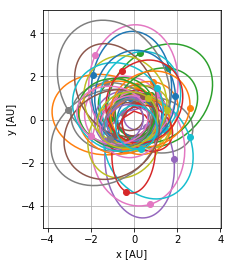

In [12]:
fig = plt.figure()
ax = plt.gca()
for i in range(50):
    o = asteroids.pop() #remove el
    asteroids.add(o) # place back into the set
    o.plot(num=50)

plt.grid()
ax.set_aspect(aspect=1)

In [13]:
len(asteroids)

1436

In [14]:
# create Earth
earth = Orbit(name='Earth')
earth.from_gtoc('Earth',54000,0.999988049532578, 1.671681163160e-2, 0.8854353079654e-3, 175.40647696473, 287.61577546182, 257.60683707535)
print(earth.details())

Orbit: Earth
 Epoch     :  54000
 a         :  0.99998805 AU
 e         :  0.01671681
 inc       :  0.00088544 deg
 LAN       :  175.40647696 deg
 argp      :  287.61577546 deg
 meanAnom0 :  257.60683708 deg
 trueAnom0 :  255.74455168 deg
 h         :  4455077233.10342026 km2/s
 r0        :  [1.00360834 -0.02160433 -0.00000091] AU
 v0        :  [0.15593867 29.66992368 -0.00045723] km/s


In [15]:
o=asteroids.pop()   # take random asteroid
asteroids.add(o)
print(o.details())

Orbit: '2005LP40'
 Epoch     :  54800.0
 a         :  1.96389755 AU
 e         :  0.54696510
 inc       :  23.60795759 deg
 LAN       :  148.70773856 deg
 argp      :  186.54498492 deg
 meanAnom0 :  71.33245044 deg
 trueAnom0 :  132.66259045 deg
 h         :  5227379457.36194134 km2/s
 r0        :  [-0.73485922 1.97877971 -0.57220771] AU
 v0        :  [-18.10807523 5.18941338 2.17255376] km/s


In [16]:
# for each launch
launch_step = 10
earliest_launch_date = 57023
latest_launch_date = 61041+10
earliest_launch_date = 58500
latest_launch_date = 59000

launch_dates = np.arange(earliest_launch_date, latest_launch_date, step=launch_step) # in MJD

launch_dates

array([58500, 58510, 58520, 58530, 58540, 58550, 58560, 58570, 58580,
       58590, 58600, 58610, 58620, 58630, 58640, 58650, 58660, 58670,
       58680, 58690, 58700, 58710, 58720, 58730, 58740, 58750, 58760,
       58770, 58780, 58790, 58800, 58810, 58820, 58830, 58840, 58850,
       58860, 58870, 58880, 58890, 58900, 58910, 58920, 58930, 58940,
       58950, 58960, 58970, 58980, 58990])

In [17]:
# test lambert for one asteroid at initial time
r_earth, v_earth = earth.rv(epoch = earliest_launch_date)
r_ast, v_ast = o.rv(epoch=earliest_launch_date+60)

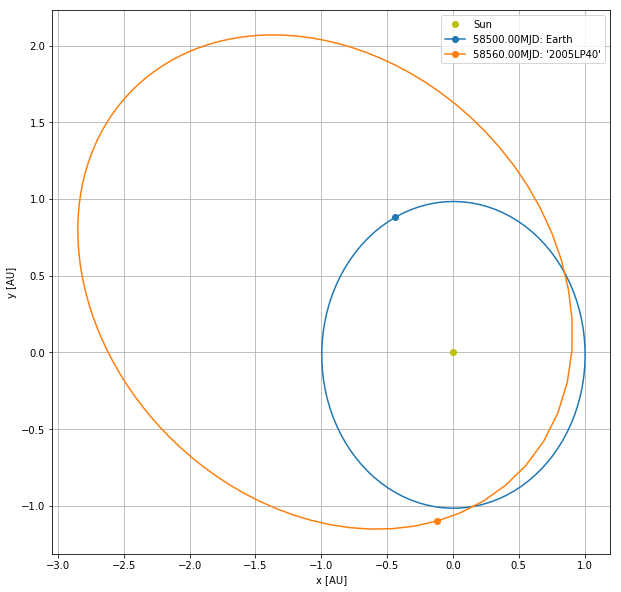

In [18]:
fig = plt.figure(figsize=(10,10))
plt.plot(0,0,'oy',label='Sun')
earth.plot(start=earliest_launch_date)
o.plot(start=earliest_launch_date + 60)
plt.legend()
plt.grid()

In [19]:
norm(r_earth)/AU2km

0.9837090253526923

In [20]:
try:
    # use Lambert formulation by izzo by default
    v1, v2 = lambert_izzo(o.mu, r_earth, r_ast,tof=60*day2s, M=0, return_='short')
except:
    # use Bate Lambert formulation if izzo fails
    v1, v2 = lambert_bate(o.mu, r_earth, r_ast, tof=60*day2s, grade='pro')
    print('Used Bate-lambert')

In [21]:
# check both methods
v1izzo, v2izzo = lambert_izzo(o.mu, r_earth, r_ast,tof=60*day2s, M=0, return_='short')
print(f'{v1izzo},{v2izzo}')
v1bate, v2bate = lambert_bate(o.mu, r_earth, r_ast, tof=60*day2s, grade='pro')
print(f'{v1bate},{v2bate}')

[-11.21118156 -50.44158768  23.86972008],[ 23.78238053 -48.60341961   0.21403602]
[-11.21118156 -50.44158768  23.86972008],[ 23.78238053 -48.60341961   0.21403602]


In [22]:
v1, v2

(array([-11.21118156, -50.44158768,  23.86972008]),
 array([ 23.78238053, -48.60341961,   0.21403602]))

In [23]:
o_trx = Orbit(name='trx1')  # trajectory object

In [24]:
o_trx.from_rv(earliest_launch_date, r_earth, v1) # initial position vector of trajectory object

In [25]:
earliest_launch_date

58500

In [26]:
o_trx.__dict__

{'index': -2,
 'name': 'trx1',
 'mu': 132712440018.0,
 'epoch0': 58500,
 'r0': array([-6.53876158e+07,  1.31836086e+08, -1.94989337e+03]),
 'v0': array([-11.21118156, -50.44158768,  23.86972008]),
 'h': 5928861183.7114725,
 'e': 1.9662963606536594,
 'LAN': 2.031238068282318,
 'inc': 0.6341080073921969,
 'argp': 1.1518416174186523,
 'trueAnom0': 5.131321325200064,
 'meanAnom0': -0.9113279366208459,
 'a': -92407250.25514854}

In [27]:
o_trx.trueAnom0

5.131321325200064

In [28]:
o_trx.e

1.9662963606536594

In [29]:
print(o_trx.details())

Orbit: trx1
 Epoch     :  58500
 a         :  -0.61770432 AU
 e         :  1.96629636
 inc       :  36.33171258 deg
 LAN       :  116.38136850 deg
 argp      :  65.99566335 deg
 meanAnom0 :  -52.21524452 deg
 trueAnom0 :  294.00305526 deg
 h         :  5928861183.71147251 km2/s
 r0        :  [-0.43708921 0.88126980 -0.00001303] AU
 v0        :  [-11.21118156 -50.44158768 23.86972008] km/s


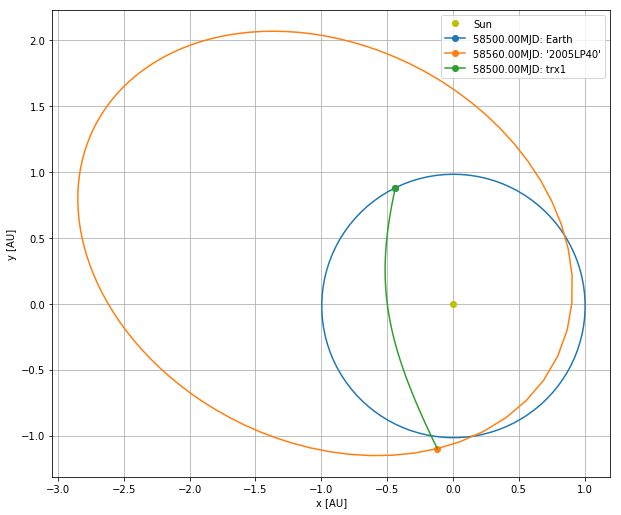

In [30]:
fig = plt.figure(figsize=(10,10))
plt.plot(0,0,'oy',label='Sun')
earth.plot(start=earliest_launch_date)
o.plot(start=earliest_launch_date+60,num=100)
o_trx.plot(earliest_launch_date, earliest_launch_date + 60) # plots trajectory
plt.legend()
plt.grid()
ax = plt.gca()
ax.set_aspect(1)

In [31]:
#fig = plt.figure(figsize=(6, 6))
#ax = fig.add_subplot(111, projection='3d')
#earth.plot(start=earliest_launch_date,num=100,dim=3)

In [32]:
dv1=v1-v_earth
print(dv1)
print(norm(dv1))

[ 15.96092022 -37.09328502  23.86948083]
46.90858005167982


In [33]:
dv2=v2-v_ast
print(dv2)
print(norm(dv2))

[ -6.13356909 -55.95923826   9.75241106]
57.13288490516039


In [34]:
# for each launch
launch_step = 10
earliest_launch_date = 57023
latest_launch_date = 61041+10
earliest_launch_date = 58500
latest_launch_date = 59000

launch_dates = np.arange(earliest_launch_date, latest_launch_date, step=launch_step) # in MJD

launch_dates = np.arange(58676-50, 58676+50, step=launch_step) # in MJD

print(launch_dates)

tof_vals = np.arange(20,65,5)
print(tof_vals)

[58626 58636 58646 58656 58666 58676 58686 58696 58706 58716]
[20 25 30 35 40 45 50 55 60]


In [35]:
type(earth)

orbit.Orbit

In [36]:

vinf_max = 4.1  # threshold c3 [km/s]

assert len(asteroids) == 1436, "check number of asteroids"
   
# store number of times where izzo lambert did not converge
use_izzo = 0
use_bate = 0

ind = 0
for ld in launch_dates:
    for tof in tof_vals:
        for ast in asteroids:

            re, ve = earth.rv(epoch=ld)
            ra, va = ast.rv(epoch=ld+tof)
            try:
                v1, v2 = lambert_izzo(earth.mu, re, ra,tof=tof*day2s,M=0, return_='short')
                use_izzo += 1
            except:
                v1, v2 = lambert_bate(o.mu, r_earth, r_ast, tof=60*day2s, grade='pro')
                use_bate += 1
             
            vinf = norm(v1-ve)
            
            if vinf<vinf_max:
                
                print(f'{ind}: date: {ld}, tof: {tof}, ast: {ast}, \t vinf: {vinf:3.2e}')
                ind += 1



C:\Users\yurio\Documents\GitHub\reGTOC04\jupyternotebooks\lambert_izzo.py:213: RuntimeWarning: invalid value encountered in double_scalars
  S_1 = (1- ll - x * eta)**0.5


0: date: 58626, tof: 50, ast: '2006WP127', 	 vinf: 3.94e+00
1: date: 58626, tof: 55, ast: '2005NE21', 	 vinf: 3.78e+00
2: date: 58626, tof: 55, ast: '2006WP127', 	 vinf: 3.95e+00
3: date: 58636, tof: 55, ast: '141593', 	 vinf: 3.84e+00
4: date: 58636, tof: 60, ast: '2000QW7', 	 vinf: 3.83e+00
5: date: 58636, tof: 60, ast: '2008SJ82', 	 vinf: 4.08e+00
6: date: 58636, tof: 60, ast: '141593', 	 vinf: 2.83e+00
7: date: 58646, tof: 50, ast: '141593', 	 vinf: 3.24e+00
8: date: 58646, tof: 55, ast: '2006QV89', 	 vinf: 3.17e+00
9: date: 58646, tof: 55, ast: '2002JR100', 	 vinf: 3.71e+00
10: date: 58646, tof: 55, ast: '2000QW7', 	 vinf: 3.88e+00
11: date: 58646, tof: 55, ast: '2007DS7', 	 vinf: 3.93e+00
12: date: 58646, tof: 55, ast: '2008SJ82', 	 vinf: 4.00e+00
13: date: 58646, tof: 55, ast: '141593', 	 vinf: 2.26e+00
14: date: 58646, tof: 60, ast: '2006QV89', 	 vinf: 2.40e+00
15: date: 58646, tof: 60, ast: '2002JR100', 	 vinf: 2.88e+00
16: date: 58646, tof: 60, ast: '2000QW7', 	 vinf: 3.07e+0

138: date: 58686, tof: 60, ast: '2004SA20', 	 vinf: 1.17e+00
139: date: 58686, tof: 60, ast: '2000QW7', 	 vinf: 1.21e+00
140: date: 58686, tof: 60, ast: '2001TB', 	 vinf: 3.61e+00
141: date: 58686, tof: 60, ast: '2007RQ12', 	 vinf: 1.52e+00
142: date: 58696, tof: 30, ast: '2006QV89', 	 vinf: 3.27e+00
143: date: 58696, tof: 30, ast: '2002JR100', 	 vinf: 3.65e+00
144: date: 58696, tof: 30, ast: '2000QW7', 	 vinf: 3.50e+00
145: date: 58696, tof: 35, ast: '2006QV89', 	 vinf: 2.43e+00
146: date: 58696, tof: 35, ast: '2002JR100', 	 vinf: 3.45e+00
147: date: 58696, tof: 35, ast: '2000QW7', 	 vinf: 2.26e+00
148: date: 58696, tof: 35, ast: '2008SJ82', 	 vinf: 4.06e+00
149: date: 58696, tof: 35, ast: '2007RQ12', 	 vinf: 3.04e+00
150: date: 58696, tof: 40, ast: '2002JR100', 	 vinf: 3.47e+00
151: date: 58696, tof: 40, ast: '2000QW7', 	 vinf: 1.48e+00
152: date: 58696, tof: 45, ast: '2006QV89', 	 vinf: 1.53e+00
153: date: 58696, tof: 45, ast: '2002JR100', 	 vinf: 3.55e+00
154: date: 58696, tof: 45,

In [37]:
print(f'Number of times izzo-lambert failed: {use_bate} out of {use_bate+use_izzo}')

Number of times izzo-lambert failed: 6708 out of 129240


In [38]:
sys.getsizeof(asteroids)  # what is this doing?

131296